In [3]:
import argparse
import os
import cv2
import numpy as np
from tqdm import tqdm
from preprocessing import parse_csv_annotations
from utils import draw_boxes
from frontend import YOLO
import json

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
config_path = 'config.json'
with open(config_path) as config_buffer:    
        config = json.load(config_buffer)

In [5]:
yolo = YOLO(backend = config['model']['backend'],
                input_size          = config['model']['input_size'], 
                labels              = config['model']['labels'], 
                max_box_per_image   = config['model']['max_box_per_image'],
                anchors             = config['model']['anchors'])

(13, 13)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 13, 13, 1024) 15739760    input_1[0][0]                    
__________________________________________________________________________________________________
DetectionLayer (Conv2D)         (None, 13, 13, 40)   41000       model_1[1][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 13, 13, 5, 8) 0           DetectionLayer[0][0]             
__________________________________________________________________________________________________
i

In [6]:
weights_path = 'tiny_yolo_indoors.h5'
yolo.load_weights(weights_path)

[]


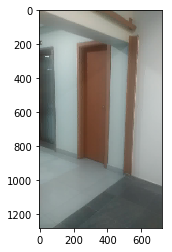

In [11]:
image = cv2.imread('/media/rodsnjr/Files/Datasets/indoor_datasets/Images/6-10.jpg')
boxes = yolo.predict(image)
image = draw_boxes(image, boxes, config['model']['labels'])

print(boxes)
plt.imshow(image)